# SIMULACIÓN | PROYECTO1_BARRIENTOS_BUSTAMANTE




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: 9 de noviembre 23:59 horas.  


- Este trabajo pondera un 25% del total del curso 

**Integrantes: Maria Barrientos - Reinaldo Bustamante** 

In [366]:

# Pandas and numpy for data manipulation
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
%matplotlib inline
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize
from IPython.display import Image
from IPython.display import display,Math
import math

In [319]:
import random

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (0,8 pts) En este contexto, defina 3 eventos de interés A, B y C, y por medio de la simulación calcule: 
    
    (a) ${P(A)}$, ${P(B)}$, ${P(C)}$ 
    
    (b) ${P(A \cup B)}$ 

    (c) ${P(A \cap C)}$

Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$



2. (0,6 pts) Defina una probabilidad condicional no independiente y calcúlela por medio de la simulación considerando el teorema de Bayes. Escriba la formulación del teorema aplicado a su caso (Prob. Cond, a priori, verosimilitud y evidencia). 



#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [320]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0, pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [321]:

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [322]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([100] * 4, 8):
    print(pop)

[100, 100, 100, 100]
[100, 100, 110.18231126161805, 89.81768873838195]
[100, 103.43872073664897, 106.74359052496908, 89.81768873838195]
[192.60800528943412, 103.43872073664897, 14.135585235534958, 89.81768873838195]
[187.18380304542728, 103.43872073664897, 19.559787479541797, 89.81768873838195]
[57.25281189455375, 103.43872073664897, 19.559787479541797, 219.74867988925547]
[57.25281189455375, 47.7152261374208, 75.28328207876997, 219.74867988925547]
[93.57899028403413, 47.7152261374208, 38.95710368928958, 219.74867988925547]
[0.926623076764713, 140.36759334469022, 38.95710368928958, 219.74867988925547]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [323]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    sd = []
    p10 = []
    p90 = []
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            p10.append(percent(10, pop))
            p90.append(percent(90, pop))
            sd.append(statistics.stdev(pop))#lista con la desviación estándar por iteración
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           
    ##returns
    return sd, p10, p90

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  20.2   53   74  100  125  145
 20,000 0.48  94.6    1   11   73  221  446
 40,000 0.49  97.8    1   10   71  228  463
 60,000 0.50  99.8    1   10   68  234  453
 80,000 0.50  98.6    1   11   69  230  450
100,000 0.50  99.1    1   10   70  230  447
120,000 0.50 101.4    1   10   68  230  473
140,000 0.50  99.4    1   11   70  228  456
160,000 0.50 100.8    1   11   67  228  481
180,000 0.50  99.2    1   11   69  224  470
200,000 0.50  99.6    1   11   71  226  474


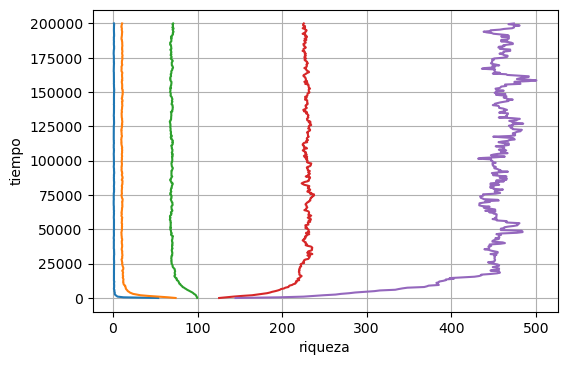

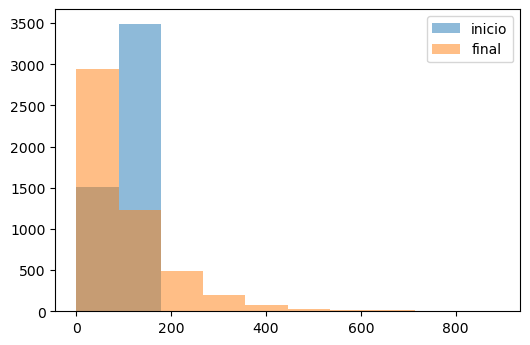

([20.153042092658563,
  94.60825326418107,
  97.83598198352563,
  99.83724795889756,
  98.6063058972228,
  99.06823710277597,
  101.39865183325828,
  99.41288223636008,
  100.7947469615479,
  99.17468593670954,
  99.60004590718182],
 [73.96904382421945,
  10.896295810862838,
  10.441444720808121,
  9.98001212934652,
  10.528312124498719,
  10.24369216727384,
  10.159458745457826,
  11.074359141830826,
  10.877491166237961,
  11.066302163069885,
  10.714195332382324],
 [125.46169361043727,
  220.59921883689017,
  227.60080403447236,
  234.36061204329977,
  230.27279221376685,
  230.04323755519448,
  230.29739088268266,
  227.59137760260143,
  227.51825531788984,
  224.09768581553837,
  225.62375814365205])

In [324]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos de una variable aleatoria. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio: https://archive.ics.uci.edu/ml/datasets.php . 

0. Indique la fuente de sus datos. 


1. (0,6 pts) Descripcion de datos: tome un conjunto de datos en ${\cal R}$ y descríbalo estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (0,8 pts) Seleccione aleatoriamente una cantidadN de sus datos y calcule sus estadísticos muestrales (al menos 3), luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (0,8 pts) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,6 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (0,8 pts) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Desarrollo

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Parte I : Propiedades de las Probabilidades

Para la simulación usaremos una cantidad de dinero 500 y una población de tamaño 10000, con una transacción "justa"

**Definicion de eventos**

- La desviación estándar de la población es mayor o igual que $500$ pesos.
- El percentil 10% es menor o igual que $50$ pesos
- El percentil 90% es mayor o igual que $1000$ pesos

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11 101.1  264  369  500  628  731
 40,000 0.49 488.6    5   53  354 1130 2242
 80,000 0.50 500.1    6   53  343 1146 2297
120,000 0.50 498.1    4   52  343 1144 2286
160,000 0.50 502.3    5   53  343 1166 2267
200,000 0.50 499.6    4   52  347 1151 2331
240,000 0.50 501.4    5   53  345 1140 2322
280,000 0.50 494.2    5   57  349 1147 2289
320,000 0.50 503.2    5   55  343 1154 2345
360,000 0.50 497.2    5   56  348 1140 2258
400,000 0.50 494.6    5   53  347 1142 2299


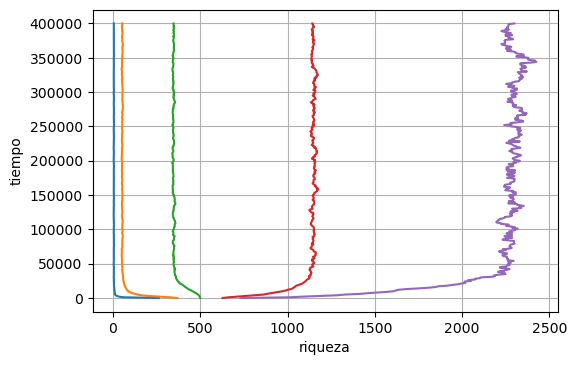

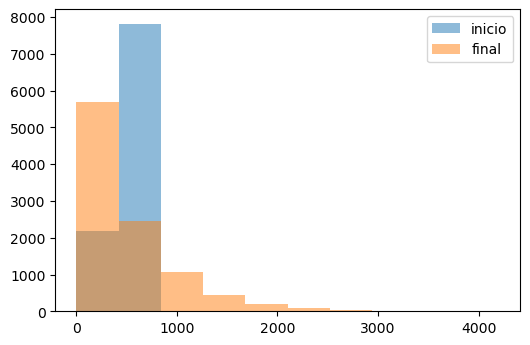

In [325]:
N  = 10000 # Tamaño de la población
MU = 500. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

sd, p10, p90 = show(dinerop)

**1.a)**  ${P(A)}$, ${P(B)}$, ${P(C)}$

In [326]:
print('sd: ', sd)
print('p10: ', p10)
print('p90: ', p90)

sd:  [101.06854166355846, 488.5871945964891, 500.1243509307091, 498.09442417276017, 502.31576261392786, 499.6379553629702, 501.39318964467617, 494.20324232550996, 503.19391898284135, 497.18433051418447, 494.56970894082605]
p10:  [369.25800755592155, 53.31931545929456, 53.46217513707768, 51.64822750719345, 52.6413585977249, 51.562560522032335, 52.90729116792133, 57.014927951392394, 54.56138779680194, 55.5110368013395, 52.57068593435261]
p90:  [628.1489348057792, 1129.8268460388647, 1145.8068603225038, 1143.6633633053575, 1165.5396536988371, 1151.0436836084489, 1139.737568883767, 1146.923015880477, 1153.6631707104016, 1139.6983278776092, 1141.9928384082932]


In [327]:
a = b = c = 0
for i in range(len(sd)):
    if (sd[i] >= 500): a+=1
    if (p10[i] <= 50): b+=1
    if (p90[i] >= 1000): c+=1

pA = a/len(sd)
pB = b/len(p10)
pC = c/len(p90)

print('La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos es: {}%'.format(pA*100))
print('La probabilidad de que el percentil 10% sea menor o igual a 50 pesos es: {}%'.format(pB*100))
print('La probabilidad de que el percentil 90% sea mayor o igual a 1000 pesos es: {}%'.format(pC*100))

La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos es: 36.36363636363637%
La probabilidad de que el percentil 10% sea menor o igual a 50 pesos es: 0.0%
La probabilidad de que el percentil 90% sea mayor o igual a 1000 pesos es: 90.9090909090909%


**1.b)** ${P(A \cup B)}$

In [328]:
AuB = pA + pB - (pA * pB)
print('La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos o el percentil 10% sea menor o igual a 50 es: {}%'.format(AuB*100))

La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos o el percentil 10% sea menor o igual a 50 es: 36.36363636363637%


**1.c)** ${P(A \cap C)}$

In [329]:
AnC = pA * pC
print('La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos y el percentil 90% sea mayor o igual a 1000 es: {}%'.format(AnC*100))

La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos y el percentil 90% sea mayor o igual a 1000 es: 33.057851239669425%


**2)**

## Parte II: Distribuciones 

**Fuente de datos a utilizar**

In [380]:
abalone = pd.read_csv('data/abalone.data')


In [381]:
abalone

,Sexo,Largo(mm),Diametro(mm),Alto(mm),Peso entero(g),Peso sin concha(g),Peso visceras(g),Peso cascara(g),anillos
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Los datos utilizados seran acerca de los abalotes, estos son unos moluscos perteneciente a la familia de moluscos gasteropodos.  
A continuacion ocuparemos la columna Peso entero(g) para realizar el siguiente analisis  

link: https://archive.ics.uci.edu/ml/datasets/Abalone

**1)**

**Descripcion de datos**

In [382]:
datos = abalone['Peso entero(g)']

In [383]:
datos.describe()

count    4177.000000
mean        0.828742
std         0.490389
min         0.002000
25%         0.441500
50%         0.799500
75%         1.153000
max         2.825500
Name: Peso entero(g), dtype: float64

**Histograma**

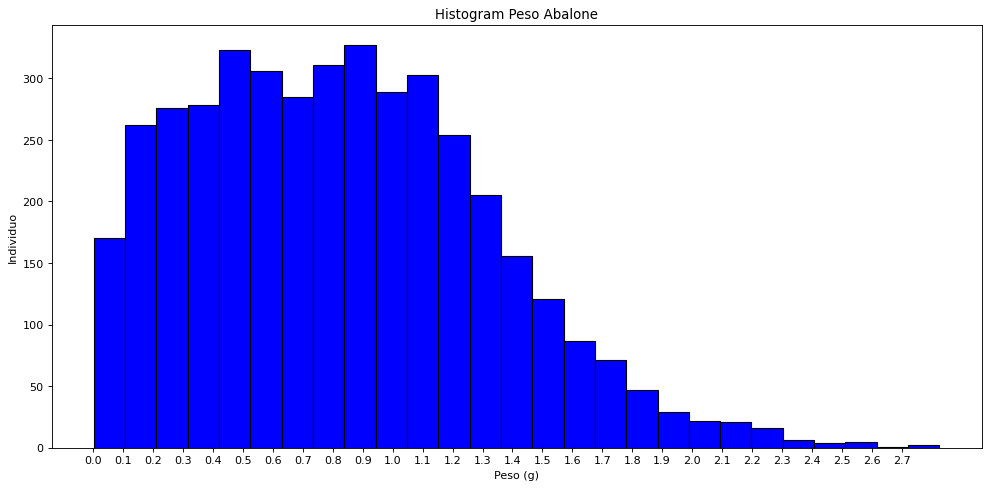

In [384]:
fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

# Make the histogram using matplotlib, bins must be integet
ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(2.8/0.1)))

plt.title('Histogram Peso Abalone')
plt.xlabel('Peso (g)'); plt.ylabel('Individuo');
plt.xticks(np.arange(0, 2.8, 0.1))

plt.show()

**Distribucion de probabilidad empirica**

**2)**

**Muestra aleatoria**

In [385]:
N = 77
aleatoria = np.random.choice(list(datos),N,replace= False)
aleatoria

array([0.8875, 0.475 , 0.5265, 1.2525, 1.259 , 0.888 , 0.406 , 1.042 ,
       0.816 , 1.0265, 0.9585, 0.197 , 0.5945, 0.9855, 0.3425, 0.3615,
       0.3945, 0.348 , 2.3305, 0.3925, 0.5965, 1.073 , 1.114 , 1.3655,
       1.2795, 1.548 , 1.4015, 1.46  , 0.6555, 0.9   , 1.5275, 0.9715,
       0.875 , 0.59  , 1.034 , 0.38  , 0.2715, 0.974 , 0.9265, 0.3995,
       1.543 , 1.3475, 0.8275, 0.4265, 0.314 , 0.5945, 0.6475, 1.15  ,
       0.972 , 1.496 , 0.6435, 0.3   , 0.959 , 0.5545, 0.798 , 0.151 ,
       0.3605, 2.1505, 0.593 , 1.175 , 0.117 , 0.3245, 1.1115, 0.839 ,
       0.6195, 0.4195, 0.369 , 0.486 , 0.2845, 1.1435, 0.5735, 1.274 ,
       0.78  , 0.514 , 0.1595, 0.893 , 0.363 ])

**Calculo estadisticos**

In [404]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(aleatoria)/len(aleatoria)
curtos = stats.kurtosis(aleatoria)
asim = stats.skew(aleatoria)
print('Promedio:',promedio)
print('curtosis:',curtos)
print('asimetria:',asim)

Promedio: 0.8065129870129871
curtosis: 0.806413478012368
asimetria: 0.8504645681157055


Ahora aumentaremos el N

In [387]:
N = np.arange(77,4177,100)

In [388]:
N

array([  77,  177,  277,  377,  477,  577,  677,  777,  877,  977, 1077,
       1177, 1277, 1377, 1477, 1577, 1677, 1777, 1877, 1977, 2077, 2177,
       2277, 2377, 2477, 2577, 2677, 2777, 2877, 2977, 3077, 3177, 3277,
       3377, 3477, 3577, 3677, 3777, 3877, 3977, 4077])

In [389]:
N = np.arange(77,4177,100)
mean = [promedio]
cur = [curtos]
asi = [asim]
for i in range(len(N)-1):
    aleat = np.random.choice(datos,N[i+1],replace = False)
    mean += [sum(aleat)/len(aleat)]    
    cur += [stats.kurtosis(aleat)]
    asi += [stats.skew(aleat)]

Text(0, 0.5, 'Asimetria')

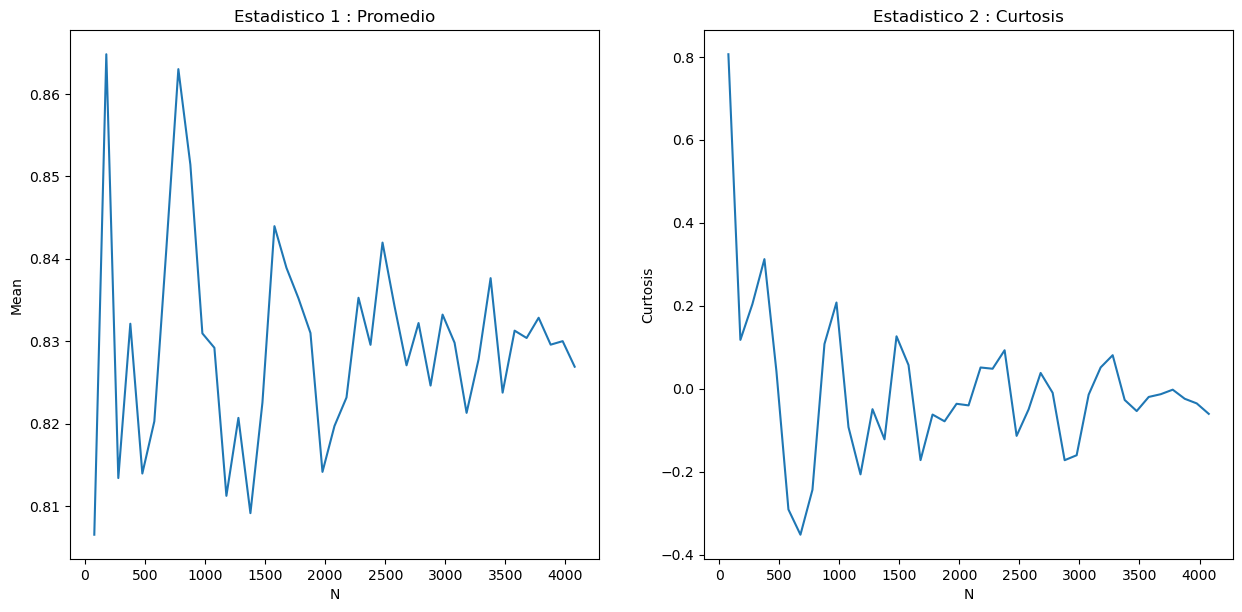

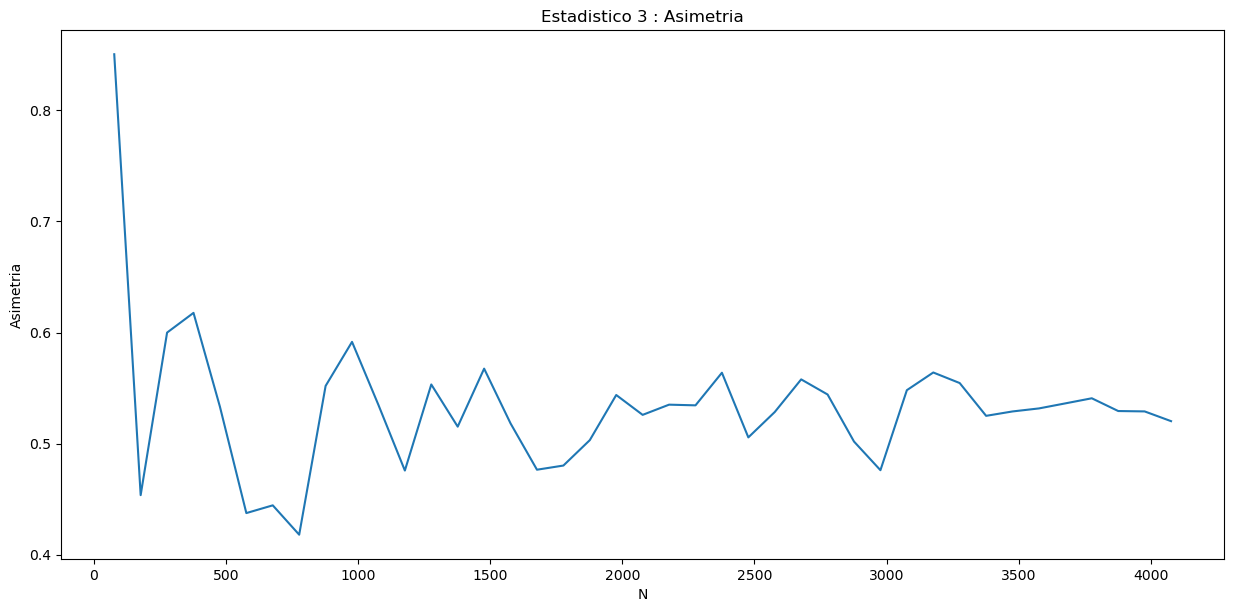

In [390]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
fig, ax1 = plt.subplots(1, figsize=(15, 7))
ax[0].plot(N,mean)
ax[0].set_title('Estadistico 1 : Promedio')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Mean')
ax[1].plot(N,cur)
ax[1].set_title('Estadistico 2 : Curtosis')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Curtosis')
ax1.plot(N,asi)
ax1.set_title('Estadistico 3 : Asimetria')
ax1.set_xlabel('N')
ax1.set_ylabel('Asimetria')

**ESPACIO PARA RESPONDER ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.**

**3)**

El conjunto de datos se dividira en 4 grupos, tres grupos de 1000 individuos y uno de 1177

In [422]:
datos_a = datos.copy()
#grupo 1
indices = np.arange(0,4177,1)
indices_g1= np.random.choice(indices,1177,replace= False)
g1 = datos_a[indices_g1]
datos_a.drop(indices_g1, inplace= True) #nuevo conjunto de datos
datos_a.index = np.arange(0,3000,1)
#grupo 2 
indices = np.arange(0,3000,1)
indices_g2= np.random.choice(indices,1000,replace= False)
g2 = datos_a[indices_g2]
datos_a.drop(indices_g2, inplace= True) #nuevo conjunto de datos
datos_a.index = np.arange(0,2000,1)
#grupo 3
indices = np.arange(0,2000,1)
indices_g3= np.random.choice(indices,1000,replace= False)
g3 = datos_a[indices_g3]
datos_a.drop(indices_g3, inplace= True) #nuevo conjunto de datos
datos_a.index = np.arange(0,1000,1)
#grupo 4
g4 = datos_a

#arreglar indices
g1.index = np.arange(0,1177,1)
g2.index = np.arange(0,1000,1)
g3.index = np.arange(0,1000,1)
g4.index = np.arange(0,1000,1)

por lo tanto tenemos que: 

**Estadisticos Muestrales + Histogramas**

In [423]:
promedio = [sum(g1)/len(g1),sum(g2)/len(g2),sum(g3)/len(g3),sum(g4)/len(g4)]
curtos = [stats.kurtosis(g1),stats.kurtosis(g2),stats.kurtosis(g3),stats.kurtosis(g4)]
asim = [stats.skew(g1),stats.skew(g2),stats.skew(g3),stats.skew(g4)]
print('Promedio:',promedio)
print('curtosis:',curtos)
print('asimetria:',asim)

Promedio: [0.8257871707731513, 0.8511010000000011, 0.816353, 0.8222504999999994]
curtosis: [0.14345839881644284, -0.09675603440026981, -0.09633906398885861, -0.07343211197019262]
asimetria: [0.5952290455104078, 0.49249378662551363, 0.519820227190596, 0.5054233828854583]


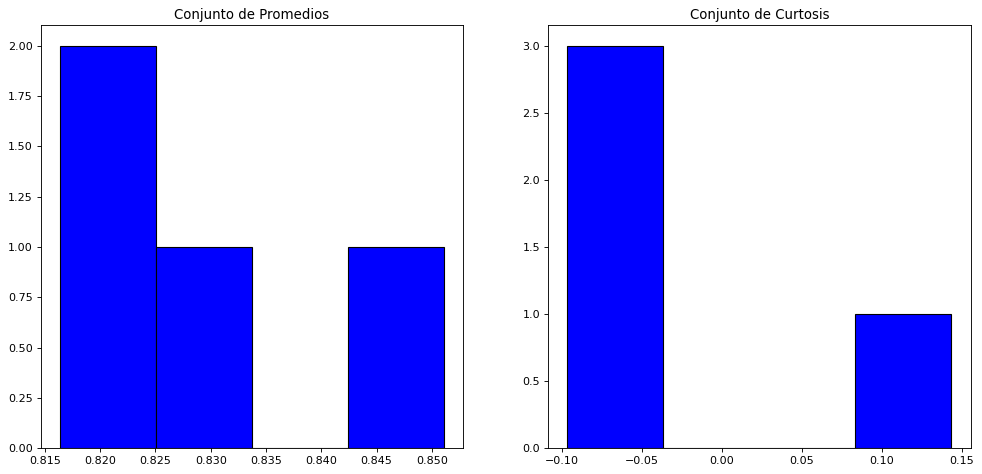

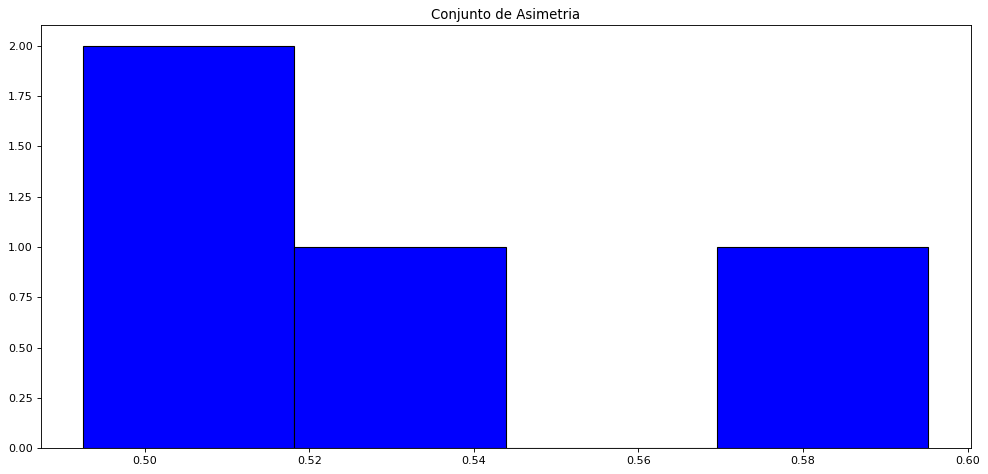

In [425]:
fig, ax = plt.subplots(1, 2,figsize=(15, 7), dpi=80)
fig, ax1 = plt.subplots(1,figsize=(15, 7), dpi=80)
ax[0].hist(promedio, color = 'blue',edgecolor='black', bins=(4))
ax[1].hist(curtos, color = 'blue',edgecolor='black', bins=(4))
ax1.hist(asim, color = 'blue',edgecolor='black', bins=(4))
ax[0].set_title('Conjunto de Promedios');
ax[1].set_title('Conjunto de Curtosis');
ax1.set_title('Conjunto de Asimetria');

**ESPACIO PARA RESPONDER ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta..**

**4)**

Podemos ver que el histograma de los datos se parece a una distribucion lognormal. esto es debido a que tenemos datos continuos ademas de ser asimetrico y la mayoria de los valores positivos. esto se puede ver mejor en la siguiente imagen.

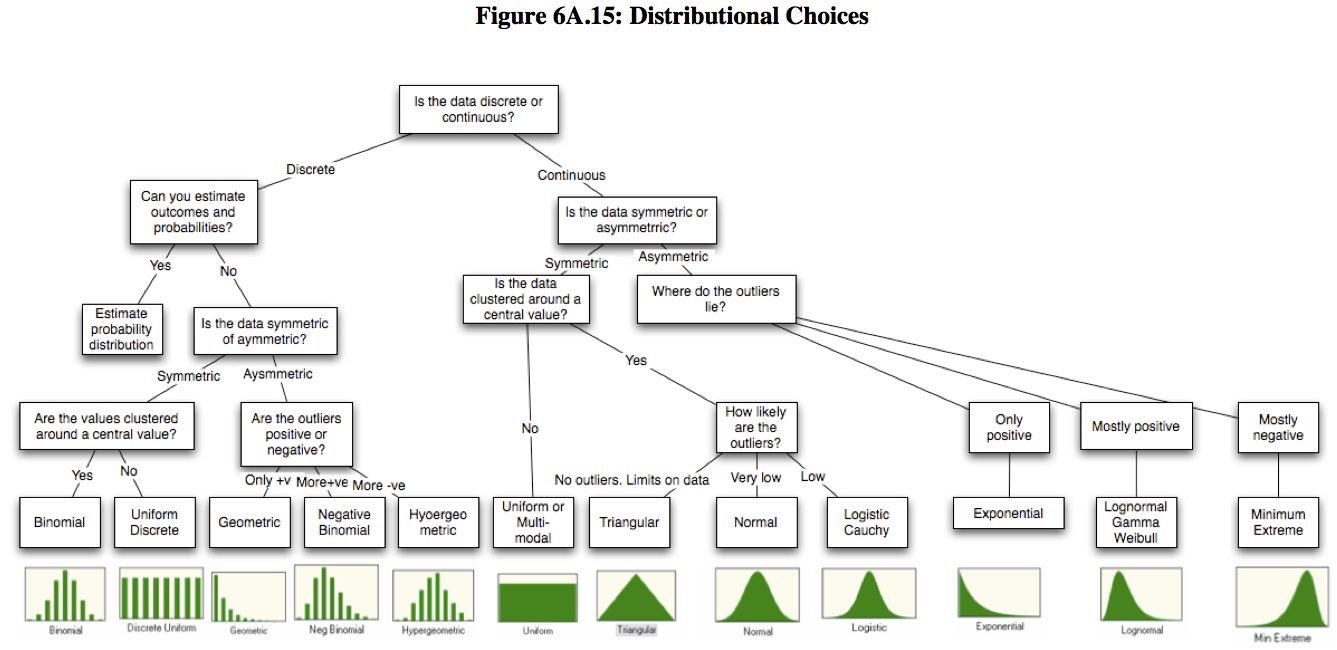

In [330]:
Image("distributions_choice.png")

Ahora veremos como se ajustan esta distribucion

(0.28548767209391646, -0.8975435734124296, 1.6581029536112977)


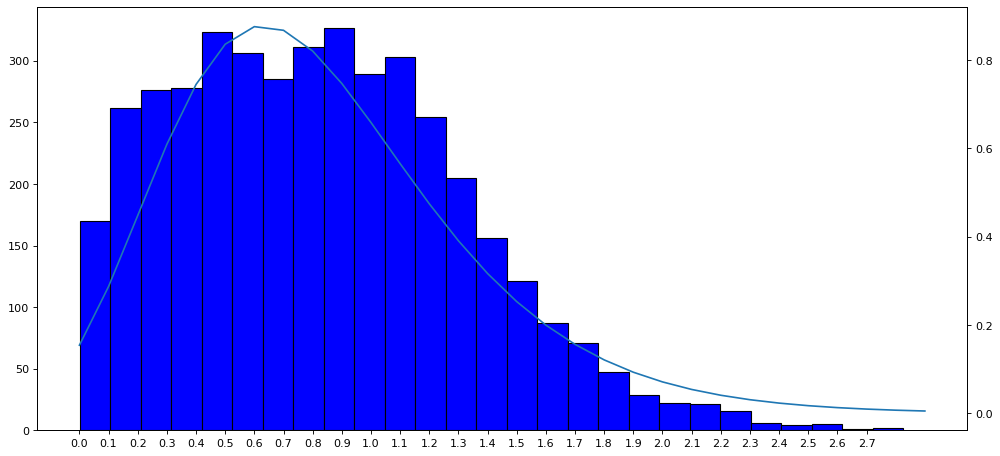

In [331]:
## ajuste de distribución LogNormal considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(2.8/0.1)))
ax2 = ax.twinx()
args = scipy.stats.lognorm.fit(datos)
print(args)
vec = np.arange(0, 3, 0.1)

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args[0],scale=args[2],loc=args[1]))
ax2.plot(vec,pvec)
plt.xticks(np.arange(0, 2.8, 0.1))
plt.draw()


In [362]:
datos2 = scipy.stats.lognorm.rvs(*args,size=100)

scipy.stats.kstest(datos, datos2)

KstestResult(statistic=0.05588939430213072, pvalue=0.9031092752909334)

**ESPACIO PARA RESPONDER ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.**

**5)**

## Parte III: Conclusiones



**1)**

**2)**